Business context--> You are the cybersecurity expert of the Company. In the last month, some cybersecurity events with different durations and patterns have been registered.

Problem statement : WHAT CAN WE DERIVE

# 1) Most targeted Destination IP Address
# 2) Most Logical Ports attacked
# 3) Most Frequently/common type of Attack
# 4) Different time of the day , (odd , hours, day or night)
# 5) Find the Pattern

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipaddress
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from datetime import datetime, timedelta
import math
import missingno as msno  #will give missing value's graph
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore') 

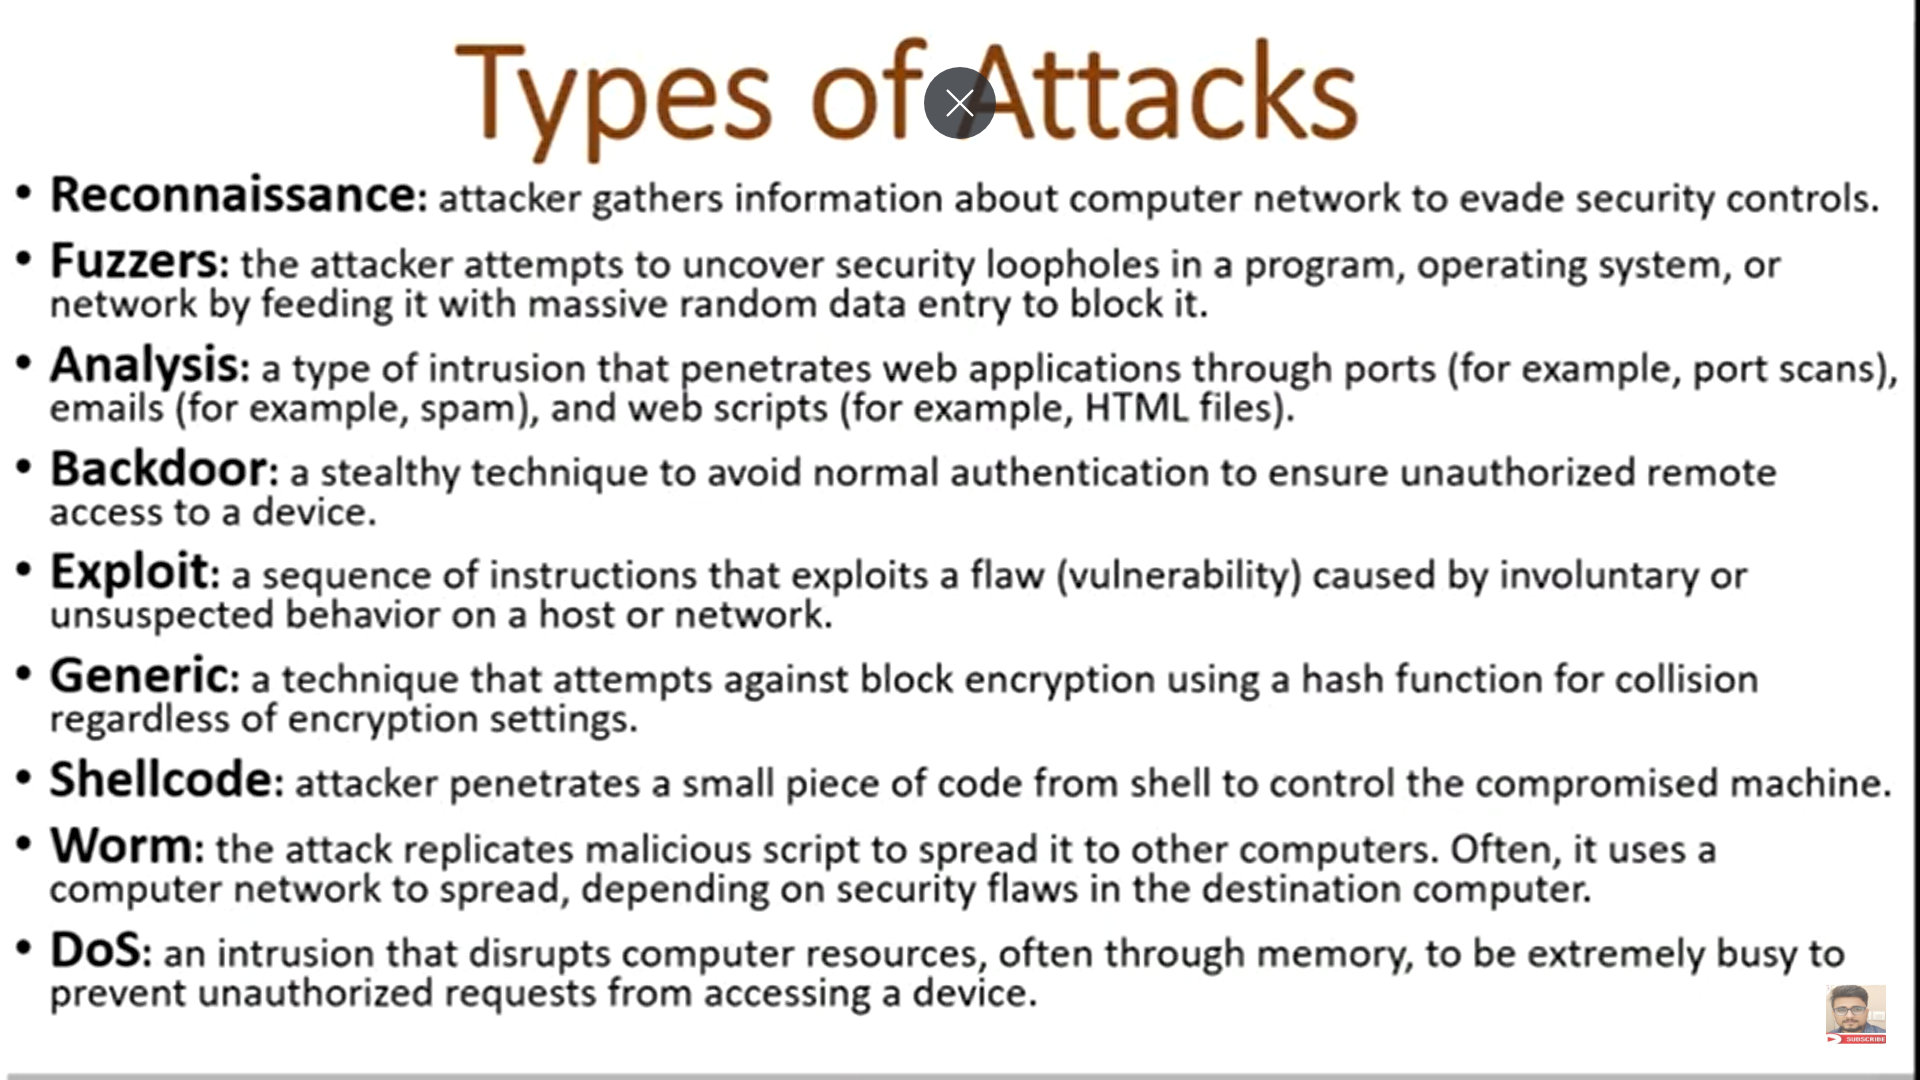

In [2]:
df=pd.read_csv('Cybersecurity_attacks.csv')
print(df.shape)

(178031, 11)


In [3]:
df.head()


Attack category   Attack subcategory Protocol     Source IP  Source Port  \
0  Reconnaissance                 HTTP      tcp  175.45.176.0        13284   
1        Exploits     Unix 'r' Service      udp  175.45.176.3        21223   
2        Exploits              Browser      tcp  175.45.176.2        23357   
3        Exploits  Miscellaneous Batch      tcp  175.45.176.2        13792   
4        Exploits           Cisco IOS       tcp  175.45.176.2        26939   

   Destination IP  Destination Port  \
0  149.171.126.16                80   
1  149.171.126.18             32780   
2  149.171.126.16                80   
3  149.171.126.16              5555   
4  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  .                   Time  
0                                                  -  .  1421927414-1421927416  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  .  1421927415-1421927415  
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  .  1421927416-1421927416  
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  .  1421927417-1421927417  
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  .  1421927418-1421927418

In [4]:
# cleaning the data-->
# in time column there is '-' which indicates the start time and end time, replaces it to the same start and last notation
#adding start and last column for the time

df[['Start time', 'Last time']]=df['Time'].str.split('-',expand=True)


In [5]:
df.head()

Attack category   Attack subcategory Protocol     Source IP  Source Port  \
0  Reconnaissance                 HTTP      tcp  175.45.176.0        13284   
1        Exploits     Unix 'r' Service      udp  175.45.176.3        21223   
2        Exploits              Browser      tcp  175.45.176.2        23357   
3        Exploits  Miscellaneous Batch      tcp  175.45.176.2        13792   
4        Exploits           Cisco IOS       tcp  175.45.176.2        26939   

   Destination IP  Destination Port  \
0  149.171.126.16                80   
1  149.171.126.18             32780   
2  149.171.126.16                80   
3  149.171.126.16              5555   
4  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  .  \
0                                                  -  .   
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  .   
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  .   
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  .   
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  .   

                    Time  Start time   Last time  
0  1421927414-1421927416  1421927414  1421927416  
1  1421927415-1421927415  1421927415  1421927415  
2  1421927416-1421927416  1421927416  1421927416  
3  1421927417-1421927417  1421927417  1421927417  
4  1421927418-1421927418  1421927418  1421927418

In [6]:
df['.'].unique()  #blank column so droping it

array(['.'], dtype=object)

In [7]:
df=df.drop(['.','Time'],axis=1)

In [8]:
df.head()

Attack category   Attack subcategory Protocol     Source IP  Source Port  \
0  Reconnaissance                 HTTP      tcp  175.45.176.0        13284   
1        Exploits     Unix 'r' Service      udp  175.45.176.3        21223   
2        Exploits              Browser      tcp  175.45.176.2        23357   
3        Exploits  Miscellaneous Batch      tcp  175.45.176.2        13792   
4        Exploits           Cisco IOS       tcp  175.45.176.2        26939   

   Destination IP  Destination Port  \
0  149.171.126.16                80   
1  149.171.126.18             32780   
2  149.171.126.16                80   
3  149.171.126.16              5555   
4  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  Start time   Last time  
0                                                  -  1421927414  1421927416  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  1421927415  1421927415  
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  1421927416  1421927416  
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  1421927417  1421927417  
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  1421927418  1421927418

<AxesSubplot:>

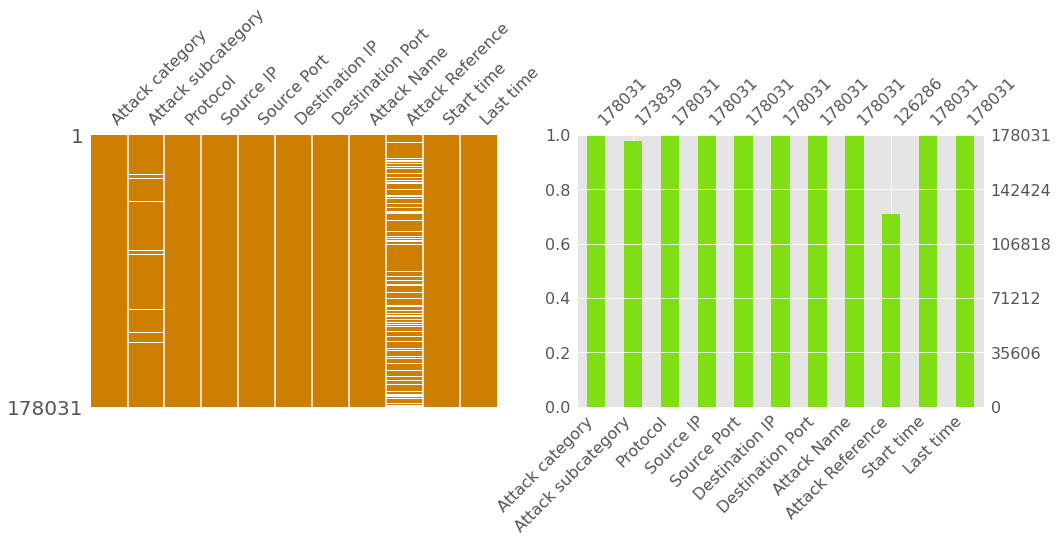

In [9]:
figure,(ax1,ax2)=plt.subplots(1,2,figsize=(16,5))

msno.matrix(df,ax=ax1,sparkline=False,color=(0.8,0.5,0.0)) #The msno. matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.
msno.bar(df,ax=ax2,color=(0.5,0.87,0.08))

In [10]:
df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

filling the null values in Attack subcategory (i can not impute it because i have to recogonised the same pattern) so replacing it to "not registered " value in the place of null values

In [11]:
df['Attack subcategory']=df['Attack subcategory'].fillna('Not Registered')
df.head()


Attack category   Attack subcategory Protocol     Source IP  Source Port  \
0  Reconnaissance                 HTTP      tcp  175.45.176.0        13284   
1        Exploits     Unix 'r' Service      udp  175.45.176.3        21223   
2        Exploits              Browser      tcp  175.45.176.2        23357   
3        Exploits  Miscellaneous Batch      tcp  175.45.176.2        13792   
4        Exploits           Cisco IOS       tcp  175.45.176.2        26939   

   Destination IP  Destination Port  \
0  149.171.126.16                80   
1  149.171.126.18             32780   
2  149.171.126.16                80   
3  149.171.126.16              5555   
4  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  Start time   Last time  
0                                                  -  1421927414  1421927416  
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  1421927415  1421927415  
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  1421927416  1421927416  
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  1421927417  1421927417  
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  1421927418  1421927418

In [12]:
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start time                0
Last time                 0
dtype: int64

In [13]:
df[pd.isnull(df).any(axis=1)].shape

(51745, 11)

In [14]:
df[df.duplicated()].shape

(6, 11)

In [15]:
print("Dimensions before dropping duplicated rows: "+str(df.shape))
df=df.drop(df[df.duplicated()].index)
print("Dimensions After dropping duplicated rows: "+str(df.shape))

Dimensions before dropping duplicated rows: (178031, 11)
Dimensions After dropping duplicated rows: (178025, 11)


In [16]:
df[df.duplicated()].shape

(0, 11)

# port range 0 to 65535 (Source port)

### removing the values which is less than 0 and greater than 65535

In [17]:
invalid_sp=(df['Source Port']<0)|(df['Source Port']>65535)
invalid_dp=(df['Destination Port']<0)|(df['Destination Port']>65535)
df[invalid_sp|invalid_dp]  #invalid sp and dp

Attack category Attack subcategory Protocol     Source IP  \
174347           Generic               IXIA      udp  175.45.176.1   
174348          Exploits            Browser      tcp  175.45.176.3   
174349   Reconnaissance                HTTP      tcp  175.45.176.1   
174350               DoS           Ethernet     pnni  175.45.176.3   
174351          Fuzzers                OSPF  trunk-1  175.45.176.0   
...                  ...                ...      ...           ...   
178026           Generic               IXIA      udp  175.45.176.0   
178027          Exploits           Browser       sep  175.45.176.3   
178028          Exploits    Office Document      tcp  175.45.176.0   
178029          Exploits           Browser       tcp  175.45.176.2   
178030   Reconnaissance                ICMP     unas  175.45.176.3   

        Source Port  Destination IP  Destination Port  \
174347        67520  149.171.126.18                53   
174348        78573  149.171.126.18               110   
174349        71804  149.171.126.10                80   
174350            0  149.171.126.19              -753   
174351        73338  149.171.126.13                 0   
...             ...             ...               ...   
178026        72349  149.171.126.12                53   
178027        67647  149.171.126.18                 0   
178028        78359  149.171.126.13               110   
178029        68488  149.171.126.19                80   
178030        77929  149.171.126.19                 0   

                                              Attack Name  \
174347  Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...   
174348  Microsoft Internet Explorer 6.0 Png pngfilt.dl...   
174349  Domino Web Server Database Access: /internet.n...   
174350  Cisco IPS Jumbo Frame System Crash (https://st...   
174351  Fuzzer: OSPF Hello Packet: Long Neighbor Lists...   
...                                                   ...   
178026  Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...   
178027  Persits XUpload ActiveX Method MakeHttpRequest...   
178028  Microsoft Excel SxView Memory Corruption (POP3...   
178029  Internet Explorer createTextRange() Code Execu...   
178030  IP Options: Loose Source Route (IP Option 3) (...   

                                         Attack Reference  Start time  \
174347  CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...  1421933561   
174348  BPS 2010-0002 (https://strikecenter.bpointsys....  1421932490   
174349                                                NaN  1424236143   
174350  CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...  1424230284   
174351                                                NaN  1424223172   
...                                                   ...         ...   
178026  CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...  1424224338   
178027  CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...  1424249567   
178028  CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...  1424219921   
178029  CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...  1424247789   
178030                                                NaN  1424230421   

         Last time  
174347  1421933561  
174348  1421932491  
174349  1424236143  
174350  1424230284  
174351  1424223172  
...            ...  
178026  1424224338  
178027  1424249567  
178028  1424219923  
178029  1424247789  
178030  1424230421  

[3684 rows x 11 columns]

In [18]:
# Removing the invalid data from our dataFrame---->>
df=df[~(invalid_sp|invalid_dp)].reset_index(drop=True)

In [19]:
df.shape

(174341, 11)

In [20]:
# checking how many protocols and attack category i have------->>
print('Total number of different protocols: ',len(df['Protocol'].unique()))
print('Total number of different Attack category: ',len(df['Attack category'].unique()))

df['Protocol'].unique()

Total number of different protocols:  131
Total number of different Attack category:  14


array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

In [21]:
df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

### there is same values with lower case and upper case in Protocol and attack categories with singular and plural words also removing the spaces 

In [22]:
df['Protocol']=df['Protocol'].str.upper().str.strip() #converting to uppercase and removing sapces
df['Attack category']=df['Attack category'].str.upper().str.strip() #converting to uppercase and removing sapces
df['Attack category']=df['Attack category'].str.strip().replace('BACKDOORS','BACKDOOR') #removing sapces & singular to plural

In [23]:
df

Attack category                    Attack subcategory Protocol  \
0       RECONNAISSANCE                                  HTTP      TCP   
1             EXPLOITS                      Unix 'r' Service      UDP   
2             EXPLOITS                               Browser      TCP   
3             EXPLOITS                   Miscellaneous Batch      TCP   
4             EXPLOITS                            Cisco IOS       TCP   
...                ...                                   ...      ...   
174336             DOS                                  IGMP      TCP   
174337         FUZZERS                                   SMB      TCP   
174338  RECONNAISSANCE   SunRPC Portmapper (TCP) UDP Service      TCP   
174339         GENERIC                                  IXIA      UDP   
174340        EXPLOITS                       Office Document      TCP   

           Source IP  Source Port  Destination IP  Destination Port  \
0       175.45.176.0        13284  149.171.126.16                80   
1       175.45.176.3        21223  149.171.126.18             32780   
2       175.45.176.2        23357  149.171.126.16                80   
3       175.45.176.2        13792  149.171.126.16              5555   
4       175.45.176.2        26939  149.171.126.10                80   
...              ...          ...             ...               ...   
174336  175.45.176.0        33654  149.171.126.12                80   
174337  175.45.176.3        36468  149.171.126.15               445   
174338  175.45.176.2        64395  149.171.126.18               111   
174339  175.45.176.0        47439  149.171.126.10                53   
174340  175.45.176.0        17293  149.171.126.17               110   

                                              Attack Name  \
0       Domino Web Server Database Access: /doladmin.n...   
1       Solaris rwalld Format String Vulnerability (ht...   
2       Windows Metafile (WMF) SetAbortProc() Code Exe...   
3       HP Data Protector Backup (https://strikecenter...   
4       Cisco IOS HTTP Authentication Bypass Level 64 ...   
...                                                   ...   
174336  Microsoft IIS Repeated Parameter Request Denia...   
174337  Fuzzer: SMB Session Setup Invalid Username (NT...   
174338  SunRPC TCP Portmapper GETPORT Request (ippathv...   
174339  Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...   
174340  Microsoft Office PowerPoint Legacy File Format...   

                                         Attack Reference  Start time  \
0                                                       -  1421927414   
1       CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  1421927415   
2       CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  1421927416   
3       CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  1421927417   
4       CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  1421927418   
...                                                   ...         ...   
174336  CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv...  1424262066   
174337                                                NaN  1424262067   
174338                                                NaN  1424262067   
174339  CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...  1424262068   
174340  CVE 2009-0227 (http://cve.mitre.org/cgi-bin/cv...  1424262068   

         Last time  
0       1421927416  
1       1421927415  
2       1421927416  
3       1421927417  
4       1421927418  
...            ...  
174336  1424262069  
174337  1424262068  
174338  1424262068  
174339  1424262068  
174340  1424262069  

[174341 rows x 11 columns]

In [24]:
# checking how many protocols and attack category Now i have------->>
print('Total number of different protocols: ',len(df['Protocol'].unique()))
print('Total number of different Attack category: ',len(df['Attack category'].unique()))

df['Protocol'].unique()

Total number of different protocols:  129
Total number of different Attack category:  9


array(['TCP', 'UDP', 'OSPF', 'SCTP', 'SEP', 'MOBILE', 'SUN-ND', 'SWIPE',
       'PIM', 'GGP', 'IP', 'IPNIP', 'ST2', 'CBT', 'EGP', 'ARGUS',
       'BBN-RCC', 'CHAOS', 'EMCON', 'IGP', 'NVP', 'PUP', 'XNET', 'MUX',
       'DCN', 'HMP', 'PRM', 'TRUNK-1', 'XNS-IDP', 'TRUNK-2', 'LEAF-1',
       'LEAF-2', 'IRTP', 'RDP', 'ISO-TP4', 'NETBLT', 'MERIT-INP',
       'MFE-NSP', '3PC', 'IDPR', 'XTP', 'DDP', 'IDPR-CMTP', 'TP++', 'IL',
       'IPV6', 'IDRP', 'IPV6-FRAG', 'IPV6-ROUTE', 'SDRP', 'GRE', 'MHRP',
       'RSVP', 'BNA', 'I-NLSP', 'RVD', 'NARP', 'IPV6-NO', 'SKIP', 'TLSP',
       'IPV6-OPTS', 'ANY', 'CFTP', 'KRYPTOLAN', 'SAT-EXPAK', 'IPPC',
       'SAT-MON', 'CPNX', 'IPCV', 'VISA', 'CPHB', 'WSN', 'BR-SAT-MON',
       'PVP', 'WB-EXPAK', 'WB-MON', 'ISO-IP', 'SECURE-VMTP', 'VMTP',
       'TTP', 'VINES', 'NSFNET-IGP', 'DGP', 'EIGRP', 'TCF', 'SPRITE-RPC',
       'LARP', 'MTP', 'AX.25', 'IPIP', 'MICP', 'AES-SP3-D', 'ENCAP',
       'ETHERIP', 'GMTP', 'PRI-ENC', 'IFMP', 'PNNI', 'ARIS', 'A/N', 'QNX',
    

In [25]:
df[pd.isnull(df['Attack Reference'])].shape

(50638, 11)

In [26]:
df[pd.isnull(df['Attack Reference'])]  #having a NAN values

Attack category                    Attack subcategory Protocol  \
258            FUZZERS                                  OSPF     OSPF   
500            FUZZERS                                   BGP      TCP   
501            FUZZERS                                   BGP      TCP   
502            FUZZERS                                   BGP      TCP   
503            FUZZERS                                   BGP      TCP   
...                ...                                   ...      ...   
174332         FUZZERS                                   SMB      TCP   
174333  RECONNAISSANCE   SunRPC Portmapper (TCP) TCP Service      TCP   
174335         FUZZERS                                   SMB      TCP   
174337         FUZZERS                                   SMB      TCP   
174338  RECONNAISSANCE   SunRPC Portmapper (TCP) UDP Service      TCP   

           Source IP  Source Port  Destination IP  Destination Port  \
258     175.45.176.3            0  149.171.126.14                 0   
500     175.45.176.2        63685  149.171.126.13               179   
501     175.45.176.2        48413  149.171.126.13               179   
502     175.45.176.2        30451  149.171.126.13               179   
503     175.45.176.2        58077  149.171.126.13               179   
...              ...          ...             ...               ...   
174332  175.45.176.3        25862  149.171.126.15               445   
174333  175.45.176.1         8250  149.171.126.10               111   
174335  175.45.176.3        39443  149.171.126.15               445   
174337  175.45.176.3        36468  149.171.126.15               445   
174338  175.45.176.2        64395  149.171.126.18               111   

                                              Attack Name Attack Reference  \
258     Fuzzer: OSPF Hello Packet: Invalid Length, Lon...              NaN   
500     BGP Header: Random Payload, Bad Length (https:...              NaN   
501     BGP Header: Random Payload, Bad Length (https:...              NaN   
502     BGP Header: Random Payload, Bad Length (https:...              NaN   
503     BGP Header: Random Payload, Bad Length (https:...              NaN   
...                                                   ...              ...   
174332  Fuzzer: SMB Session Setup Invalid Username (NT...              NaN   
174333  SunRPC TCP Portmapper GETPORT Request (rpc_met...              NaN   
174335  Fuzzer: SMB Session Setup Invalid Username (NT...              NaN   
174337  Fuzzer: SMB Session Setup Invalid Username (NT...              NaN   
174338  SunRPC TCP Portmapper GETPORT Request (ippathv...              NaN   

        Start time   Last time  
258     1421927643  1421927645  
500     1421927755  1421927755  
501     1421927755  1421927756  
502     1421927756  1421927756  
503     1421927756  1421927756  
...            ...         ...  
174332  1424262065  1424262066  
174333  1424262065  1424262066  
174335  1424262066  1424262066  
174337  1424262067  1424262068  
174338  1424262067  1424262068  

[50638 rows x 11 columns]

In [27]:
# now print the Attack categorirs in which all the Attack References are missing-->>

print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: Attack category, dtype: int64


In [28]:
print(df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts())

FUZZERS           29649
RECONNAISSANCE    18149
ANALYSIS           1617
SHELLCODE           747
GENERIC             341
BACKDOOR             66
DOS                  53
WORMS                11
EXPLOITS              5
Name: Attack category, dtype: int64


In [29]:
print(df['Attack category'].value_counts())

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64


In [30]:
# Percentage of missing values in 'Attack Reference' per Attack Category

((df[pd.isnull(df['Attack Reference'])]['Attack category'].value_counts()/df['Attack category'].value_counts())*100).dropna().sort_values(ascending=False)


RECONNAISSANCE    90.132102
FUZZERS           88.141388
ANALYSIS          85.964912
SHELLCODE         49.437459
WORMS              6.508876
GENERIC            1.717019
BACKDOOR           1.516196
DOS                0.215605
EXPLOITS           0.007330
Name: Attack category, dtype: float64

In [31]:
tcp_ports=pd.read_csv('TCP-ports.csv')

In [32]:
tcp_ports.head()

Port      Service                   Description
0     0          NaN                      Reserved
1     1       tcpmux  TCP Port Service Multiplexer
2     2  compressnet            Management Utility
3     3  compressnet           Compression Process
4     5          rje              Remote Job Entry

In [33]:
tcp_ports['Service']=tcp_ports['Service'].str.upper()

In [34]:
tcp_ports.head()  #Port=Destination Port(in df)

Port      Service                   Description
0     0          NaN                      Reserved
1     1       TCPMUX  TCP Port Service Multiplexer
2     2  COMPRESSNET            Management Utility
3     3  COMPRESSNET           Compression Process
4     5          RJE              Remote Job Entry

In [35]:
# merging the Ports in existing dataSet (Cybersecurity_attacks)--->>

print('Dimensions before merging dataframes:',(df.shape))
newdf=pd.merge(df,tcp_ports[['Port','Service']],left_on='Destination Port',right_on='Port',how='left') #left_on-->df, right_on-->tcp_port, how-->df
newdf=newdf.rename(columns={'Service':'Destination port Service'})
print('Dimensions After merging dataframes:',(newdf.shape))

Dimensions before merging dataframes: (174341, 11)
Dimensions After merging dataframes: (174341, 13)


In [36]:
newdf.head()

Attack category   Attack subcategory Protocol     Source IP  Source Port  \
0  RECONNAISSANCE                 HTTP      TCP  175.45.176.0        13284   
1        EXPLOITS     Unix 'r' Service      UDP  175.45.176.3        21223   
2        EXPLOITS              Browser      TCP  175.45.176.2        23357   
3        EXPLOITS  Miscellaneous Batch      TCP  175.45.176.2        13792   
4        EXPLOITS           Cisco IOS       TCP  175.45.176.2        26939   

   Destination IP  Destination Port  \
0  149.171.126.16                80   
1  149.171.126.18             32780   
2  149.171.126.16                80   
3  149.171.126.16              5555   
4  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  Start time   Last time  \
0                                                  -  1421927414  1421927416   
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  1421927415  1421927415   
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  1421927416  1421927416   
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  1421927417  1421927417   
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  1421927418  1421927418   

     Port Destination port Service  
0    80.0                     HTTP  
1     NaN                      NaN  
2    80.0                     HTTP  
3  5555.0           PERSONAL-AGENT  
4    80.0                     HTTP

In [37]:
newdf=newdf.drop(columns='Port')
newdf.head()

Attack category   Attack subcategory Protocol     Source IP  Source Port  \
0  RECONNAISSANCE                 HTTP      TCP  175.45.176.0        13284   
1        EXPLOITS     Unix 'r' Service      UDP  175.45.176.3        21223   
2        EXPLOITS              Browser      TCP  175.45.176.2        23357   
3        EXPLOITS  Miscellaneous Batch      TCP  175.45.176.2        13792   
4        EXPLOITS           Cisco IOS       TCP  175.45.176.2        26939   

   Destination IP  Destination Port  \
0  149.171.126.16                80   
1  149.171.126.18             32780   
2  149.171.126.16                80   
3  149.171.126.16              5555   
4  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference  Start time   Last time  \
0                                                  -  1421927414  1421927416   
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...  1421927415  1421927415   
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...  1421927416  1421927416   
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...  1421927417  1421927417   
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...  1421927418  1421927418   

  Destination port Service  
0                     HTTP  
1                      NaN  
2                     HTTP  
3           PERSONAL-AGENT  
4                     HTTP

##  DONE WITH THE PART OF DATA CLEANING

# EDA-------->>

In [38]:
newdf['Attack category'].unique()

array(['RECONNAISSANCE', 'EXPLOITS', 'DOS', 'GENERIC', 'SHELLCODE',
       'FUZZERS', 'WORMS', 'BACKDOOR', 'ANALYSIS'], dtype=object)

In [39]:
newdf['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

In [40]:
newdf['Attack category'].value_counts()*100/newdf['Attack category'].value_counts().sum()

EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

#### this data is not balanced as we can see there is not equal number of figuers in Attack category 

#### so making these figures approximately eqaul numbers (but taking it as it is)

<AxesSubplot:ylabel='Attack category'>

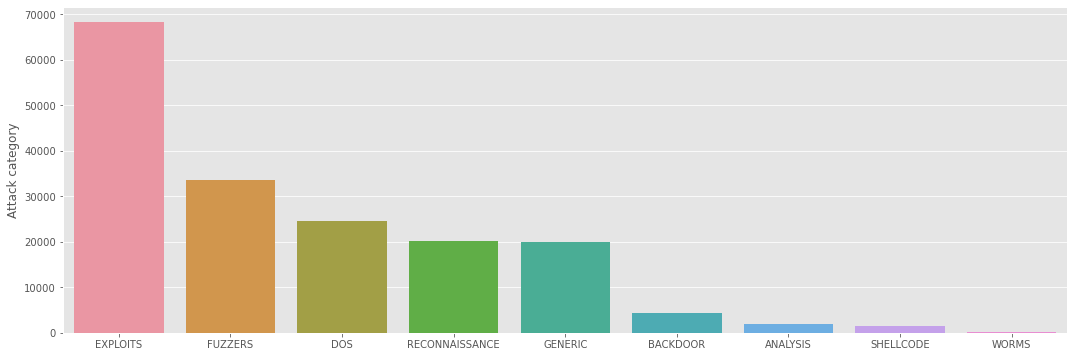

In [41]:
plt.figure(figsize=(18,6))
sns.barplot(x=newdf['Attack category'].value_counts().index,y=newdf['Attack category'].value_counts())

In [42]:
pd.DataFrame(newdf['Attack category'].value_counts())[:]

Attack category
EXPLOITS                  68211
FUZZERS                   33638
DOS                       24582
RECONNAISSANCE            20136
GENERIC                   19860
BACKDOOR                   4353
ANALYSIS                   1881
SHELLCODE                  1511
WORMS                       169

In [43]:
a=pd.DataFrame(newdf['Attack category'].value_counts())[:6]

In [44]:
a

Attack category
EXPLOITS                  68211
FUZZERS                   33638
DOS                       24582
RECONNAISSANCE            20136
GENERIC                   19860
BACKDOOR                   4353

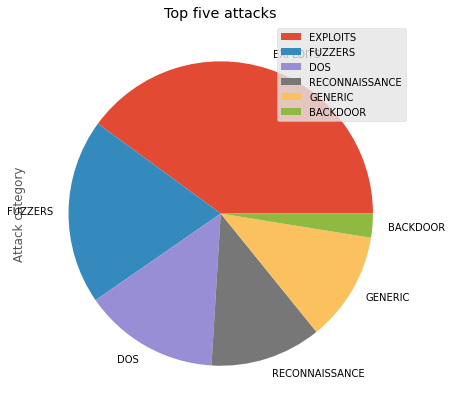

In [45]:
a.plot(kind='pie', subplots=True, figsize=(7, 7))
plt.title('Top five attacks')
plt.legend()
plt.show()

# NOW TO ANALYSE Attacks WITH DATE AND TIME


In [46]:
newdf['Start time']

0         1421927414
1         1421927415
2         1421927416
3         1421927417
4         1421927418
             ...    
174336    1424262066
174337    1424262067
174338    1424262067
174339    1424262068
174340    1424262068
Name: Start time, Length: 174341, dtype: object

In [86]:
# converting data of timing in date and time format---->>

newdf['Start time']=pd.to_datetime(newdf['Start time'],unit='s')
newdf['Last time']=pd.to_datetime(newdf['Last time'],unit='s')
newdf['Duration']=((newdf['Last time']-newdf['Start time']).dt.seconds).astype(int)

In [87]:
newdf

Attack category                    Attack subcategory Protocol  \
0       RECONNAISSANCE                                  HTTP      TCP   
1             EXPLOITS                      Unix 'r' Service      UDP   
2             EXPLOITS                               Browser      TCP   
3             EXPLOITS                   Miscellaneous Batch      TCP   
4             EXPLOITS                            Cisco IOS       TCP   
...                ...                                   ...      ...   
174336             DOS                                  IGMP      TCP   
174337         FUZZERS                                   SMB      TCP   
174338  RECONNAISSANCE   SunRPC Portmapper (TCP) UDP Service      TCP   
174339         GENERIC                                  IXIA      UDP   
174340        EXPLOITS                       Office Document      TCP   

           Source IP  Source Port  Destination IP  Destination Port  \
0       175.45.176.0        13284  149.171.126.16                80   
1       175.45.176.3        21223  149.171.126.18             32780   
2       175.45.176.2        23357  149.171.126.16                80   
3       175.45.176.2        13792  149.171.126.16              5555   
4       175.45.176.2        26939  149.171.126.10                80   
...              ...          ...             ...               ...   
174336  175.45.176.0        33654  149.171.126.12                80   
174337  175.45.176.3        36468  149.171.126.15               445   
174338  175.45.176.2        64395  149.171.126.18               111   
174339  175.45.176.0        47439  149.171.126.10                53   
174340  175.45.176.0        17293  149.171.126.17               110   

                                              Attack Name  \
0       Domino Web Server Database Access: /doladmin.n...   
1       Solaris rwalld Format String Vulnerability (ht...   
2       Windows Metafile (WMF) SetAbortProc() Code Exe...   
3       HP Data Protector Backup (https://strikecenter...   
4       Cisco IOS HTTP Authentication Bypass Level 64 ...   
...                                                   ...   
174336  Microsoft IIS Repeated Parameter Request Denia...   
174337  Fuzzer: SMB Session Setup Invalid Username (NT...   
174338  SunRPC TCP Portmapper GETPORT Request (ippathv...   
174339  Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...   
174340  Microsoft Office PowerPoint Legacy File Format...   

                                         Attack Reference          Start time  \
0                                                       - 2015-01-22 11:50:14   
1       CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:15   
2       CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:16   
3       CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:17   
4       CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:18   
...                                                   ...                 ...   
174336  CVE 2010-1899 (http://cve.mitre.org/cgi-bin/cv... 2015-02-18 12:21:06   
174337                                                NaN 2015-02-18 12:21:07   
174338                                                NaN 2015-02-18 12:21:07   
174339  CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv... 2015-02-18 12:21:08   
174340  CVE 2009-0227 (http://cve.mitre.org/cgi-bin/cv... 2015-02-18 12:21:08   

                 Last time Destination port Service  Duration (in sec.)  \
0      2015-01-22 11:50:16                     HTTP                   2   
1      2015-01-22 11:50:15                      NaN                   0   
2      2015-01-22 11:50:16                     HTTP                   0   
3      2015-01-22 11:50:17           PERSONAL-AGENT                   0   
4      2015-01-22 11:50:18                     HTTP                   0   
...                    ...                      ...                 ...   
174336 2015-02-18 12:21:09                    

In [88]:
newdf['Start time']

0        2015-01-22 11:50:14
1        2015-01-22 11:50:15
2        2015-01-22 11:50:16
3        2015-01-22 11:50:17
4        2015-01-22 11:50:18
                 ...        
174336   2015-02-18 12:21:06
174337   2015-02-18 12:21:07
174338   2015-02-18 12:21:07
174339   2015-02-18 12:21:08
174340   2015-02-18 12:21:08
Name: Start time, Length: 174341, dtype: datetime64[ns]

In [89]:
newdf['Start time'].astype(str)

0         2015-01-22 11:50:14
1         2015-01-22 11:50:15
2         2015-01-22 11:50:16
3         2015-01-22 11:50:17
4         2015-01-22 11:50:18
                 ...         
174336    2015-02-18 12:21:06
174337    2015-02-18 12:21:07
174338    2015-02-18 12:21:07
174339    2015-02-18 12:21:08
174340    2015-02-18 12:21:08
Name: Start time, Length: 174341, dtype: object

In [90]:
newdf['Start time'].astype(str).str.split(' ')

0         [2015-01-22, 11:50:14]
1         [2015-01-22, 11:50:15]
2         [2015-01-22, 11:50:16]
3         [2015-01-22, 11:50:17]
4         [2015-01-22, 11:50:18]
                   ...          
174336    [2015-02-18, 12:21:06]
174337    [2015-02-18, 12:21:07]
174338    [2015-02-18, 12:21:07]
174339    [2015-02-18, 12:21:08]
174340    [2015-02-18, 12:21:08]
Name: Start time, Length: 174341, dtype: object

In [91]:
newdf['Start time'].astype(str).str.split(' ').str[0]

0         2015-01-22
1         2015-01-22
2         2015-01-22
3         2015-01-22
4         2015-01-22
             ...    
174336    2015-02-18
174337    2015-02-18
174338    2015-02-18
174339    2015-02-18
174340    2015-02-18
Name: Start time, Length: 174341, dtype: object

In [92]:
newdf['Start time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

we are going to execute from now on is based on information related to two days, Thursday - January 22nd/2015, and on Wednesday - February 18th/2015.

In [93]:
newdf.describe()

Source Port  Destination Port  Duration (in sec.)       Duration
count  174341.000000     174341.000000       174341.000000  174341.000000
mean    15391.130382       1304.599423            2.341572       2.341572
std     21707.824000       7466.035607            9.309381       9.309381
min         0.000000          0.000000            0.000000       0.000000
25%         0.000000          0.000000            0.000000       0.000000
50%         0.000000          0.000000            0.000000       0.000000
75%     31862.000000         80.000000            1.000000       1.000000
max     65535.000000      65535.000000           60.000000      60.000000

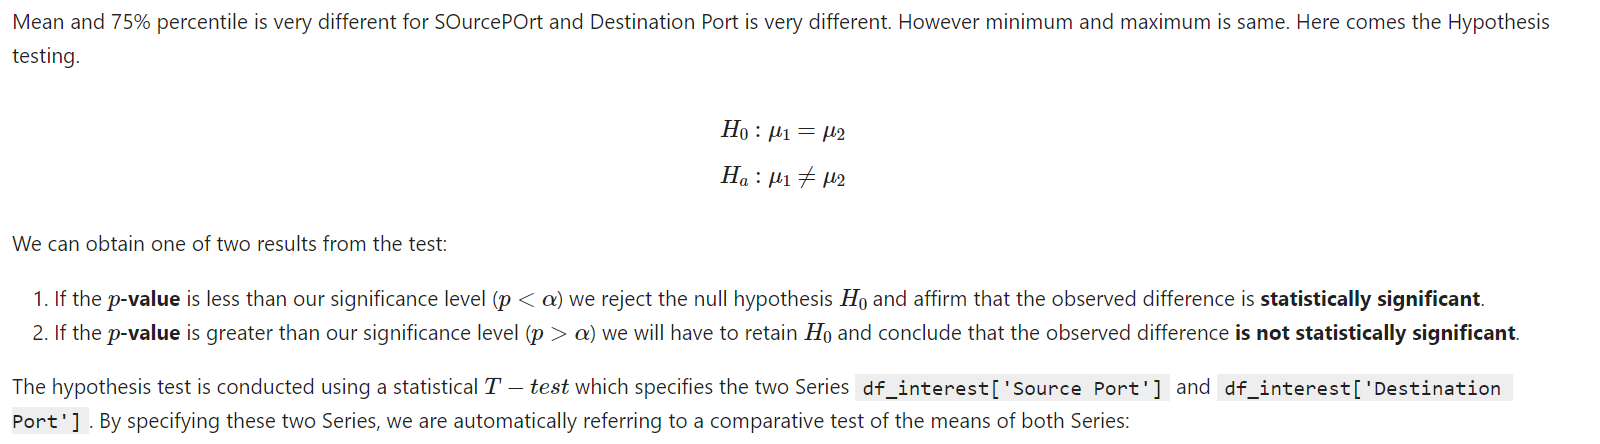

In [94]:
# calculating the p value in T tesat---->>
statisticsa,Pvalue=stats.ttest_ind(newdf['Source Port'],newdf['Destination Port'],equal_var=False)
print('P-value in T-test:',Pvalue)

P-value in T-test: 0.0


p-value is much less then alpha value and reject null hypothesis(h0) and accept alternative hypothesis(Ha) 

here we conclude that attacker is attacking not on the random port, they are seleting lower port only.


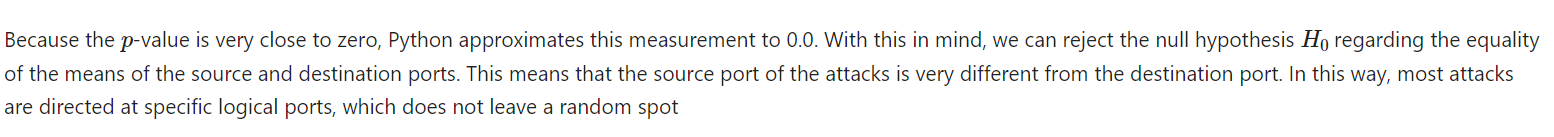

We will be using two methods for correlation calculation: •Pearson's correlation: evaluates the linear relationships between two variables. If the value is close to 0, there is a weak or nonexistent linear relationship between the variables. •Spearman's correlation: evaluates the monotonic relationships between two variables. If the value is close to 0, there is a weak or nonexistent monotonic relationship between the variables.

In [95]:
newdf.corr(method='pearson')

Source Port  Destination Port  Duration (in sec.)  \
Source Port            1.000000          0.137155           -0.078024   
Destination Port       0.137155          1.000000           -0.026770   
Duration (in sec.)    -0.078024         -0.026770            1.000000   
Duration              -0.078024         -0.026770            1.000000   

                    Duration  
Source Port        -0.078024  
Destination Port   -0.026770  
Duration (in sec.)  1.000000  
Duration            1.000000

In [96]:
newdf.corr(method='spearman')

Source Port  Destination Port  Duration (in sec.)  \
Source Port            1.000000          0.885328            0.361013   
Destination Port       0.885328          1.000000            0.346909   
Duration (in sec.)     0.361013          0.346909            1.000000   
Duration               0.361013          0.346909            1.000000   

                    Duration  
Source Port         0.361013  
Destination Port    0.346909  
Duration (in sec.)  1.000000  
Duration            1.000000

In [97]:
# converting catagorical to numerical data---->
df_dummies = pd.get_dummies(newdf, columns=['Attack category'])

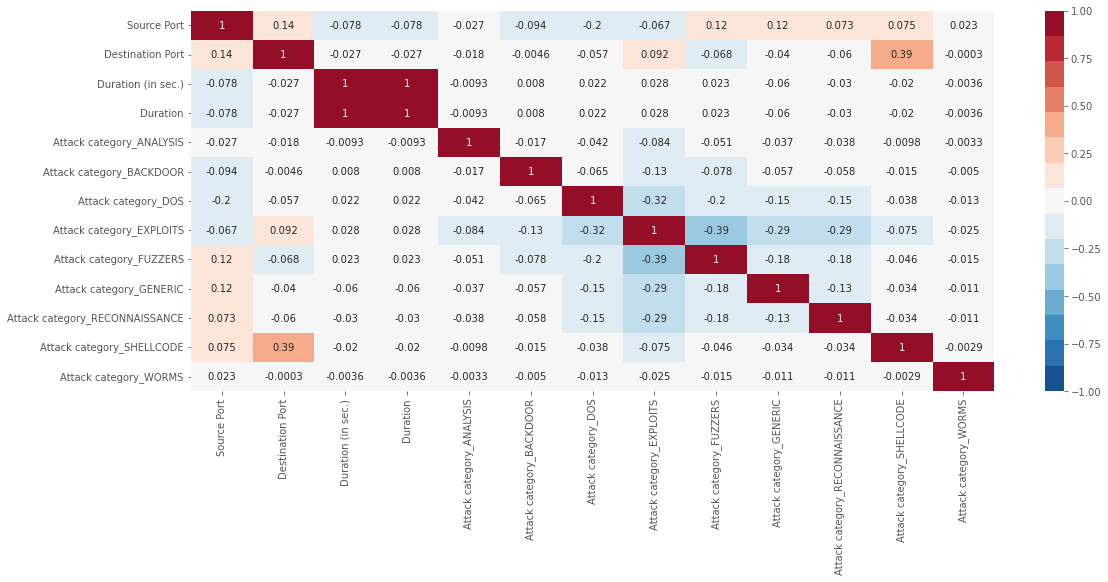

In [98]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='pearson'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

Lot of values are colourless so they are no correlation

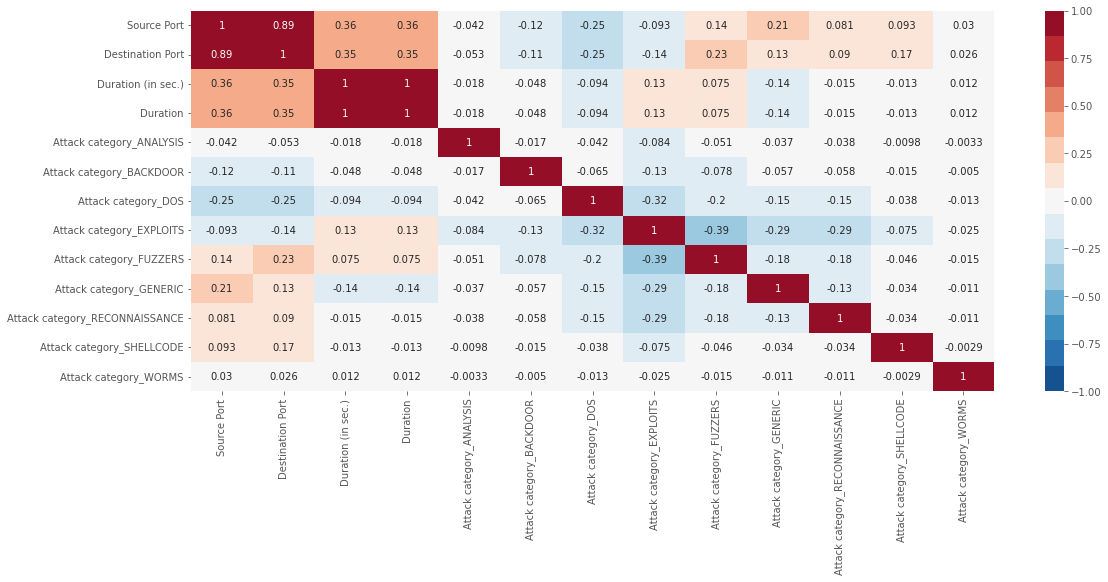

In [99]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='spearman'), 
            annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r", 15))
plt.show()

Lot of values are colored so no correlation variables reduce

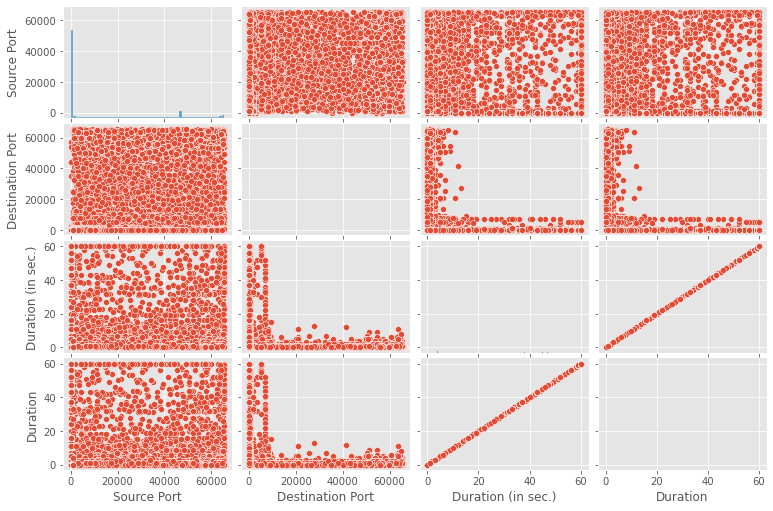

In [100]:
s=sns.pairplot(newdf)
s.fig.set_size_inches(11,7)
plt.show()

we observed thaat lower destination port having higher duration

In [101]:
newdf['Destination IP'].value_counts()[:5]  #selecting top 5

149.171.126.17    43199
149.171.126.10    24002
149.171.126.19    21619
149.171.126.13    20464
149.171.126.18    13301
Name: Destination IP, dtype: int64

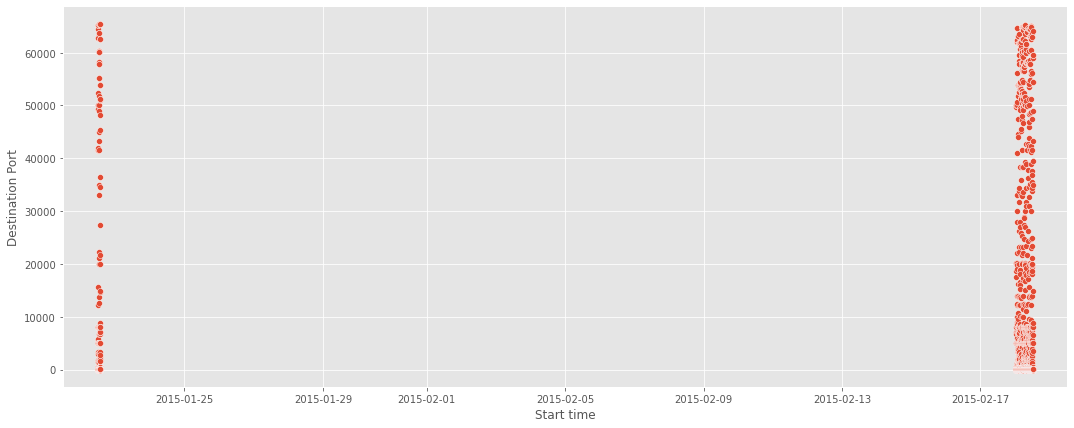

In [102]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min()-timedelta(days=1),right=newdf['Start time'].max()+timedelta(days=1))
plt.grid(True)
plt.show()

ZOOMING MORE because not able to identifing the accurat date

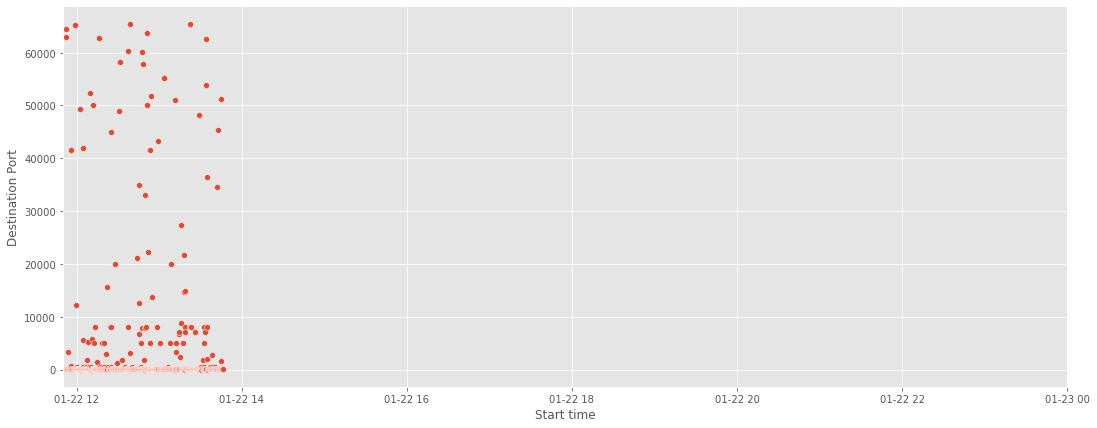

In [103]:
# LEFT REGION--->>
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start time'].min(),right=datetime.strptime('15-01-23', '%y-%m-%d'))
plt.grid(True)
plt.show()

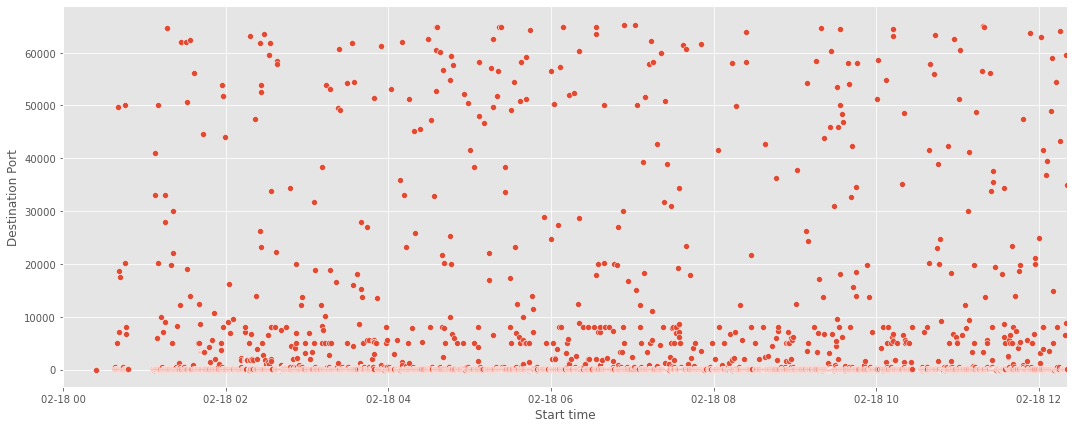

In [104]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'),right=newdf['Start time'].max())
plt.grid(True)
plt.show()

most of the attackes in lower ports

# ZOOMIG MORE TOWORDS THE LOWER PORT

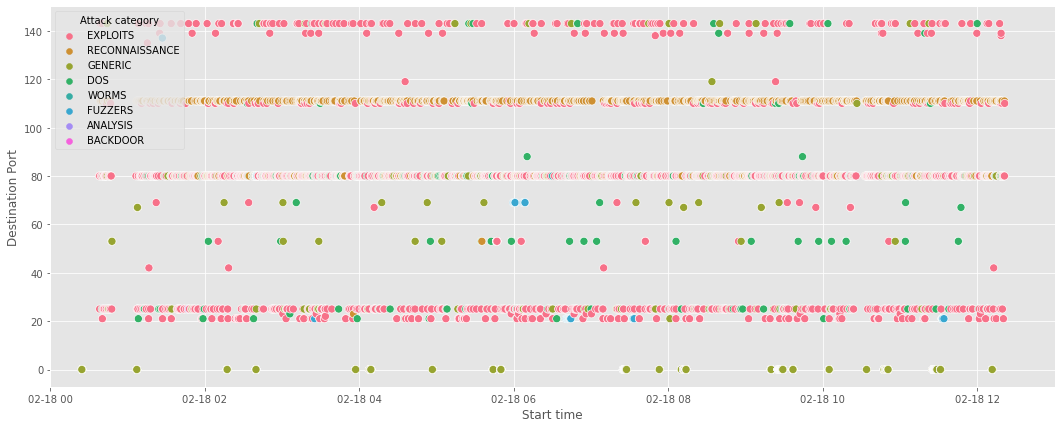

In [105]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Start time', y='Destination Port', hue='Attack category', 
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)], 
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

# Duration vs Destination Ports

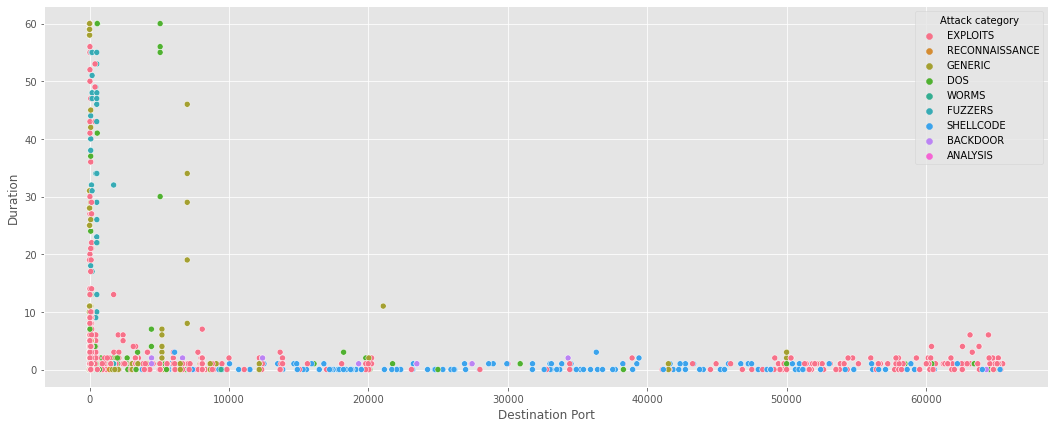

In [107]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category', data=newdf[newdf['Destination IP']=='149.171.126.17'])
plt.grid(True)
plt.show()

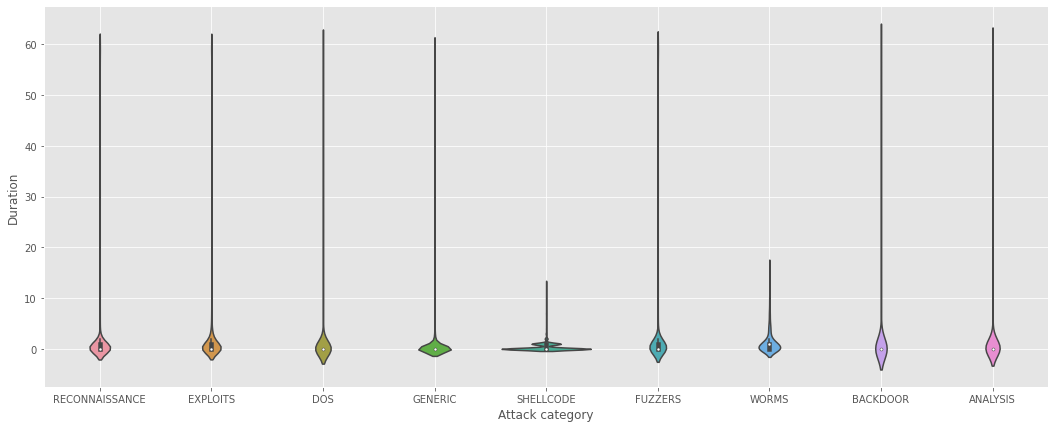

In [108]:
plt.figure(figsize=(18,7))
sns.violinplot(x='Attack category', y='Duration', data=newdf)
plt.grid(True)
plt.show()

In [110]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(18,8))
    ax = sns.heatmap(df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [111]:
newdf["Start time"][1].hour

11

In [112]:
df_pivot = newdf.copy()
df_pivot['hour'] = df_pivot.apply(lambda row: '0'*(2-len(str(row['Start time'].hour)))+str(row['Start time'].hour)+':00:00', axis=1)

In [113]:
df_pivot[:5]

Attack category   Attack subcategory Protocol     Source IP  Source Port  \
0  RECONNAISSANCE                 HTTP      TCP  175.45.176.0        13284   
1        EXPLOITS     Unix 'r' Service      UDP  175.45.176.3        21223   
2        EXPLOITS              Browser      TCP  175.45.176.2        23357   
3        EXPLOITS  Miscellaneous Batch      TCP  175.45.176.2        13792   
4        EXPLOITS           Cisco IOS       TCP  175.45.176.2        26939   

   Destination IP  Destination Port  \
0  149.171.126.16                80   
1  149.171.126.18             32780   
2  149.171.126.16                80   
3  149.171.126.16              5555   
4  149.171.126.10                80   

                                         Attack Name  \
0  Domino Web Server Database Access: /doladmin.n...   
1  Solaris rwalld Format String Vulnerability (ht...   
2  Windows Metafile (WMF) SetAbortProc() Code Exe...   
3  HP Data Protector Backup (https://strikecenter...   
4  Cisco IOS HTTP Authentication Bypass Level 64 ...   

                                    Attack Reference          Start time  \
0                                                  - 2015-01-22 11:50:14   
1  CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:15   
2  CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:16   
3  CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:17   
4  CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv... 2015-01-22 11:50:18   

            Last time Destination port Service  Duration (in sec.)  Duration  \
0 2015-01-22 11:50:16                     HTTP                   2         2   
1 2015-01-22 11:50:15                      NaN                   0         0   
2 2015-01-22 11:50:16                     HTTP                   0         0   
3 2015-01-22 11:50:17           PERSONAL-AGENT                   0         0   
4 2015-01-22 11:50:18                     HTTP                   0         0   

       hour  
0  11:00:00  
1  11:00:00  
2  11:00:00  
3  11:00:00  
4  11:00:00

In [114]:
df_p1 = pd.pivot_table(df_pivot,values='Attack Name', index=['hour'], columns=['Attack category'], aggfunc='count')
df_p1

Attack category  ANALYSIS  BACKDOOR   DOS  EXPLOITS  FUZZERS  GENERIC  \
hour                                                                    
00:00:00                3        16   127       543      391       60   
01:00:00              186      1148  2640      6716     4477     1748   
02:00:00               71       100   630      2861     1983     1031   
03:00:00              226        60  3755      9759     2743     1513   
04:00:00               64        87   617      2776     2090     1349   
05:00:00              198       645  3038      9368     2536     1834   
06:00:00               84        90   637      2968     2065      994   
07:00:00              179       578  3390      6151     2413     2076   
08:00:00               73       111   664      2938     2048     1081   
09:00:00              199       635  3545      7325     2667     2108   
10:00:00               79       121   643      2794     1981     1081   
11:00:00              203       470  3890      8461     3923     1920   
12:00:00              257       266   778      3845     3005     1460   
13:00:00               59        26   228      1706     1316     1605   

Attack category  RECONNAISSANCE  SHELLCODE  WORMS  
hour                                               
00:00:00                    177         20      3  
01:00:00                   1804        105     14  
02:00:00                   1023        113     10  
03:00:00                   2727        113     17  
04:00:00                   1034        115     10  
05:00:00                   1750        111     15  
06:00:00                   1010        116      9  
07:00:00                   1846        116     15  
08:00:00                   1010        107     11  
09:00:00                   2110        116     15  
10:00:00                    945        102      9  
11:00:00                   2696        135     18  
12:00:00                   1282        154     17  
13:00:00                    722         88      6

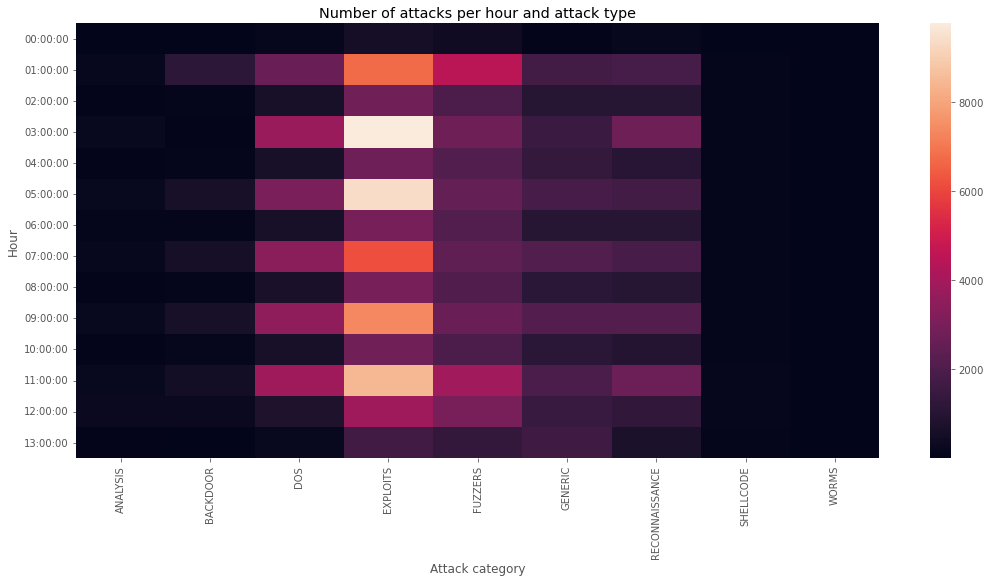

In [115]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'Number of attacks per hour and attack type')


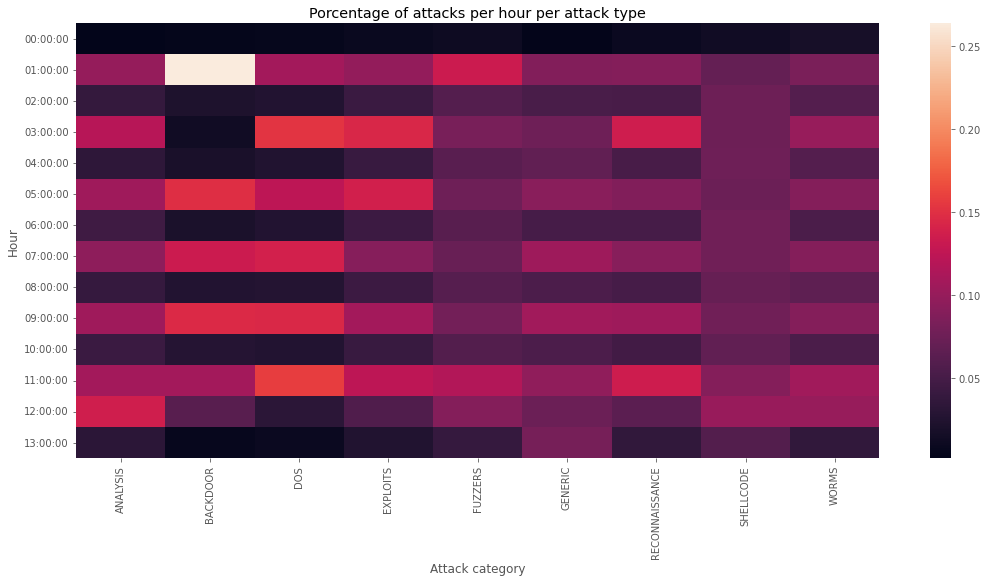

In [116]:
heatmap_graph(df = df_p1/df_p1.sum(), xlabel = 'Attack category', ylabel = 'Hour', title = 'Porcentage of attacks per hour per attack type')


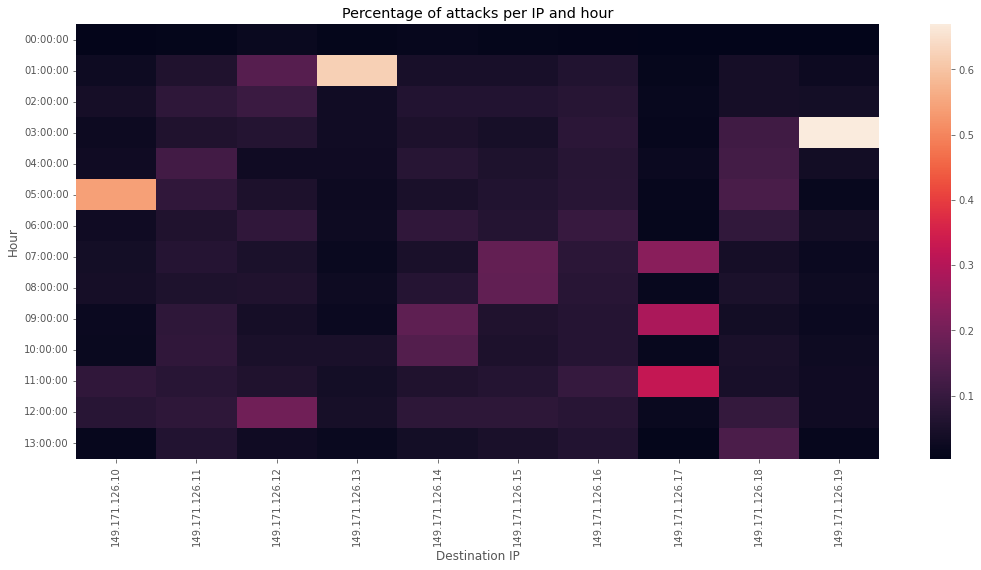

In [117]:
df_p2 = pd.pivot_table(df_pivot, values='Attack Name', index=['hour'], columns=['Destination IP'], aggfunc='count')
heatmap_graph(df = df_p2/df_p2.sum(), xlabel = 'Destination IP', ylabel = 'Hour', title = 'Percentage of attacks per IP and hour')

Although there are more than 170,000 records related to cybersecurity attacks, these attacks target 10 servers with IPv4 addresses in the interval [149.171.126.10,149.171.126.19] . This means that the company was attacked on multiple occasions during the observed timeframe, on a specific subnet, which denotes a non-accidental and directed succession of events.

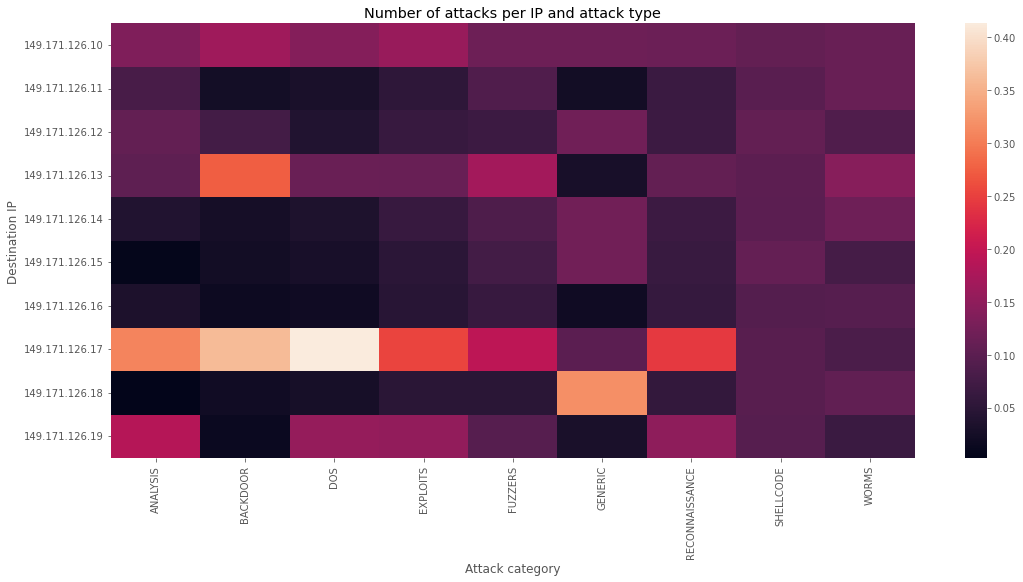

In [118]:
df_p3 = pd.pivot_table(df_pivot, values='Attack Name', index=['Destination IP'], columns=['Attack category'], aggfunc='count')
heatmap_graph(df = df_p3/df_p3.sum(), xlabel = 'Attack category', ylabel = 'Destination IP', title = 'Number of attacks per IP and attack type')

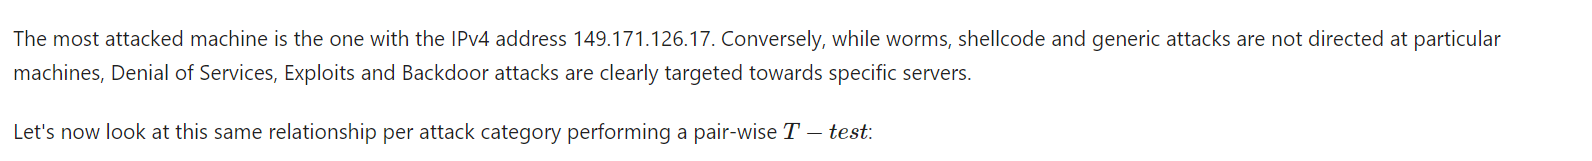

In [119]:
for attack in list(newdf['Attack category'].unique()):
    df_attack = newdf[newdf['Attack category'] == attack].copy()
    statistic, pvalue = stats.ttest_ind(df_attack['Source Port'], df_attack['Destination Port'], equal_var=False)
    print('p-value in T-test for ' + attack + ' attack: ' + str(pvalue))

p-value in T-test for RECONNAISSANCE attack: 0.0
p-value in T-test for EXPLOITS attack: 0.0
p-value in T-test for DOS attack: 0.0
p-value in T-test for GENERIC attack: 0.0
p-value in T-test for SHELLCODE attack: 0.3205085348227197
p-value in T-test for FUZZERS attack: 0.0
p-value in T-test for WORMS attack: 4.246722648635902e-46
p-value in T-test for BACKDOOR attack: 4.8983630604388355e-17
p-value in T-test for ANALYSIS attack: 9.319524862935004e-87


As can be seen, the 𝑝-values of all but one attack category are very close to 0.0. This means that the attacks have been directed to the specific ports, except for the Shellcode attacks, whose null hypothesis cannot be rejected. For this type of attack there is a defined randomness, which means that the source and destination ports have similar averages.

To verify this statement, we will make use of a contingency table which allows to relate the count of a certain pair of variables, similar to how we saw the .pivot_table()

In [120]:
df_crosstab = pd.crosstab(newdf['Attack category'], newdf['Destination Port'])
df_crosstab

Destination Port  0      10     21     22     23     25     31     42     \
Attack category                                                            
ANALYSIS           1442      0      0      0      0      6      0      0   
BACKDOOR           4000      0      7      0      0      0      7      0   
DOS               20825      4     75      0     13    425      0      0   
EXPLOITS          40143      0   2198     14    135   4412      0     21   
FUZZERS           13355      0    758      0      0      0      0      0   
GENERIC            2612      0     26      6      0    427      0      0   
RECONNAISSANCE     8324      0      0      0      7      7      0      0   
SHELLCODE             0      0      0      0      0      0      0      0   
WORMS                 0      0      0      0      0      0      0      0   

Destination Port  53     67     ...  65455  65460  65470  65479  65486  65497  \
Attack category                 ...                                             
ANALYSIS              0      0  ...      0      0      0      0      0      0   
BACKDOOR              0      0  ...      0      0      0      0      0      0   
DOS                 154     33  ...      0      0      0      0      0      0   
EXPLOITS            209     98  ...      2      2      2      2      2      4   
FUZZERS               0      0  ...      0      0      0      0      0      0   
GENERIC           13438     54  ...      0      0      0      0      0      0   
RECONNAISSANCE       41      0  ...      0      0      0      0      0      0   
SHELLCODE             0      0  ...      0      0      0      0      0      0   
WORMS                 0      0  ...      0      0      0      0      0      0   

Destination Port  65502  65511  65517  65535  
Attack category                               
ANALYSIS              0      0      0      0  
BACKDOOR              0      0      0      0  
DOS                   0      0      0      0  
EXPLOITS              2      2      2      0  
FUZZERS               0      0      0      0  
GENERIC               0      0      0      6  
RECONNAISSANCE        0      0      0      0  
SHELLCODE             0      0      0      0  
WORMS                 0      0      0      0  

[9 rows x 3182 columns]

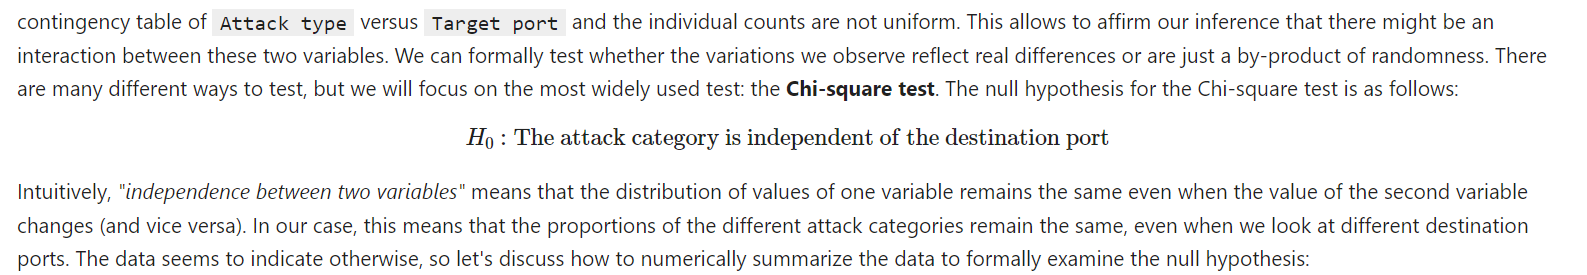

In [121]:
chi2, p_value, dof, expected = chi2_contingency(df_crosstab)
print("p-value of Chi-square test for Attack category vs. Destination Port =", p_value)

p-value of Chi-square test for Attack category vs. Destination Port = 0.0


p-value of Chi-square test for Attack category vs. Destination Port = 0.0
The 𝑝 -value is extremely small and therefore we reject the null hypothesis and conclude that the attack category and destination port are not independent. In other words, the destination port do not remain the same for different attack categories, what agrees with what we observe previously.

To visualize this relationship between these variables (source port, destination port, and attack category), we can initially make a scatterplot using the .scatterplot() function between the source and destination ports in terms of the attack category:

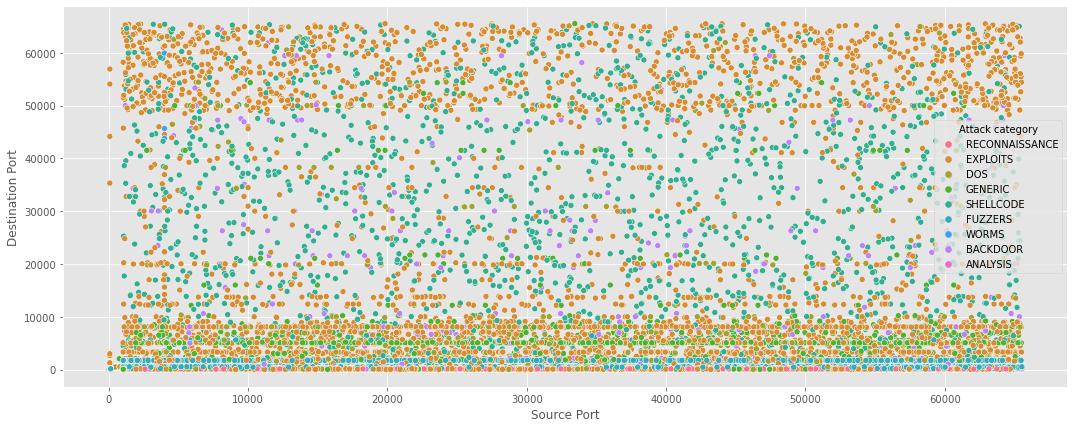

In [122]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Source Port',y='Destination Port', hue='Attack category',data=newdf)
plt.show()

A certain pattern can be seen in the graph, in which attacks usually occur on ports less than 10,000 or greater than 50,000, except for shellcode-type attacks, as we had anticipated in the hypothesis test.

To see this relationship more in depth, we can visualize the the distribution of the logical origin and destination ports with a strip diagram using the .stripplot() function:

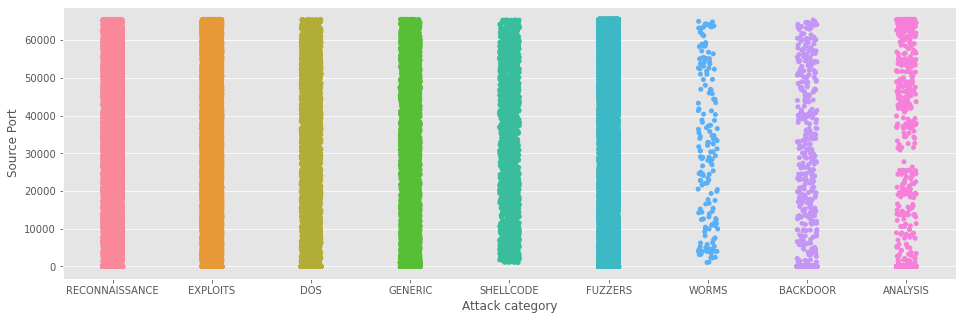

In [123]:
# Source ports
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Source Port',data=newdf)
plt.show()

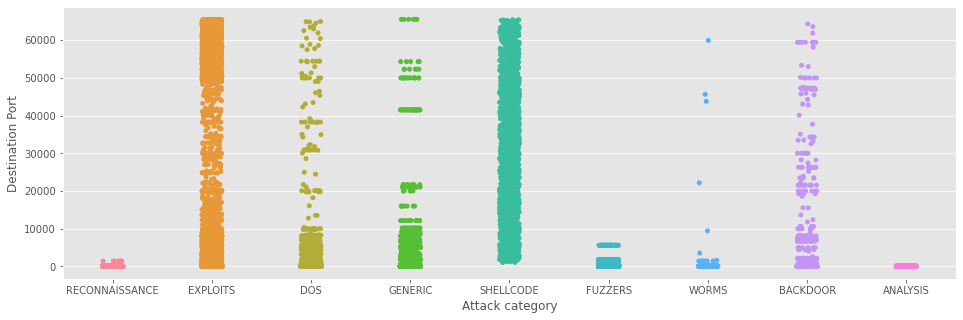

In [124]:
# Destination ports
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Destination Port',data=newdf)
plt.show()

In [125]:
list(newdf['Source IP'].unique())

['175.45.176.0', '175.45.176.3', '175.45.176.2', '175.45.176.1']

view of the distribution of destination ports by attack category and source IP:

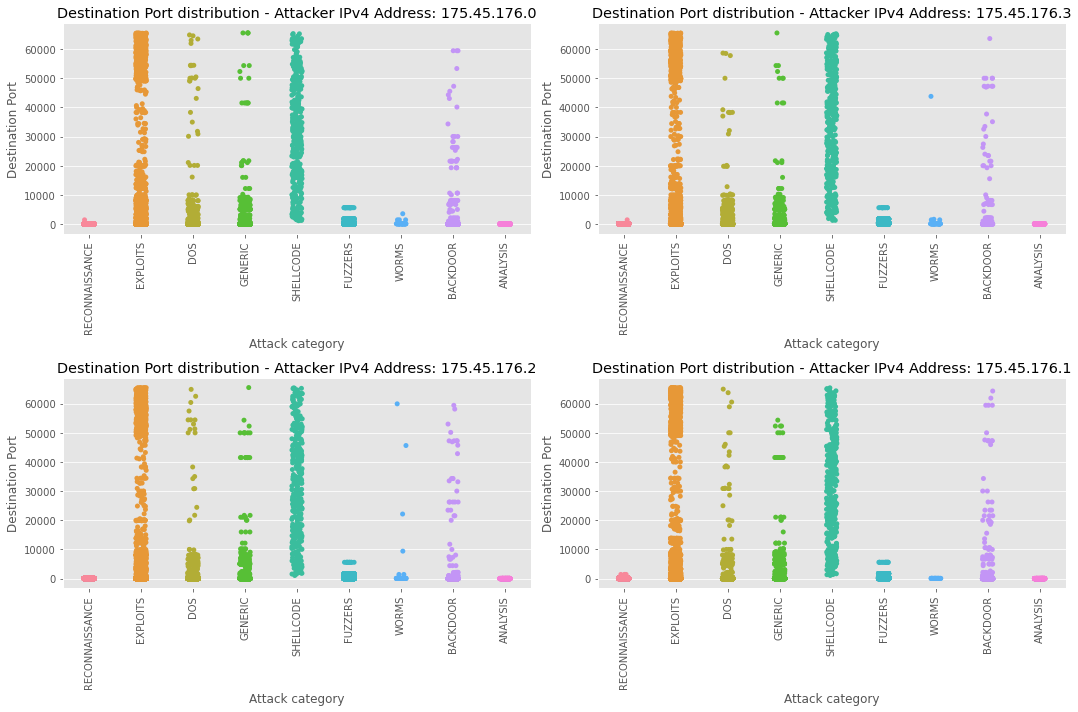

In [126]:
ips = list(newdf['Source IP'].unique())
f, axes = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())
for i, ip in enumerate(ips):
    sns.stripplot(x='Attack category',y='Destination Port',data=newdf[newdf['Source IP'] == ip], order=labels, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_xlabel('Attack category')
    axes[int(i/2)][i%2].set_ylabel('Destination Port')
    axes[int(i/2)][i%2].set_title('Destination Port distribution - Attacker IPv4 Address: ' + ip)
    axes[int(i/2)][i%2].set_xticklabels(labels,rotation=90)
plt.tight_layout()
plt.show()

view of the distribution of destination ports by attack category and destination IP:

In [127]:
list(newdf['Destination IP'].unique())

['149.171.126.16',
 '149.171.126.18',
 '149.171.126.10',
 '149.171.126.15',
 '149.171.126.14',
 '149.171.126.12',
 '149.171.126.13',
 '149.171.126.11',
 '149.171.126.17',
 '149.171.126.19']

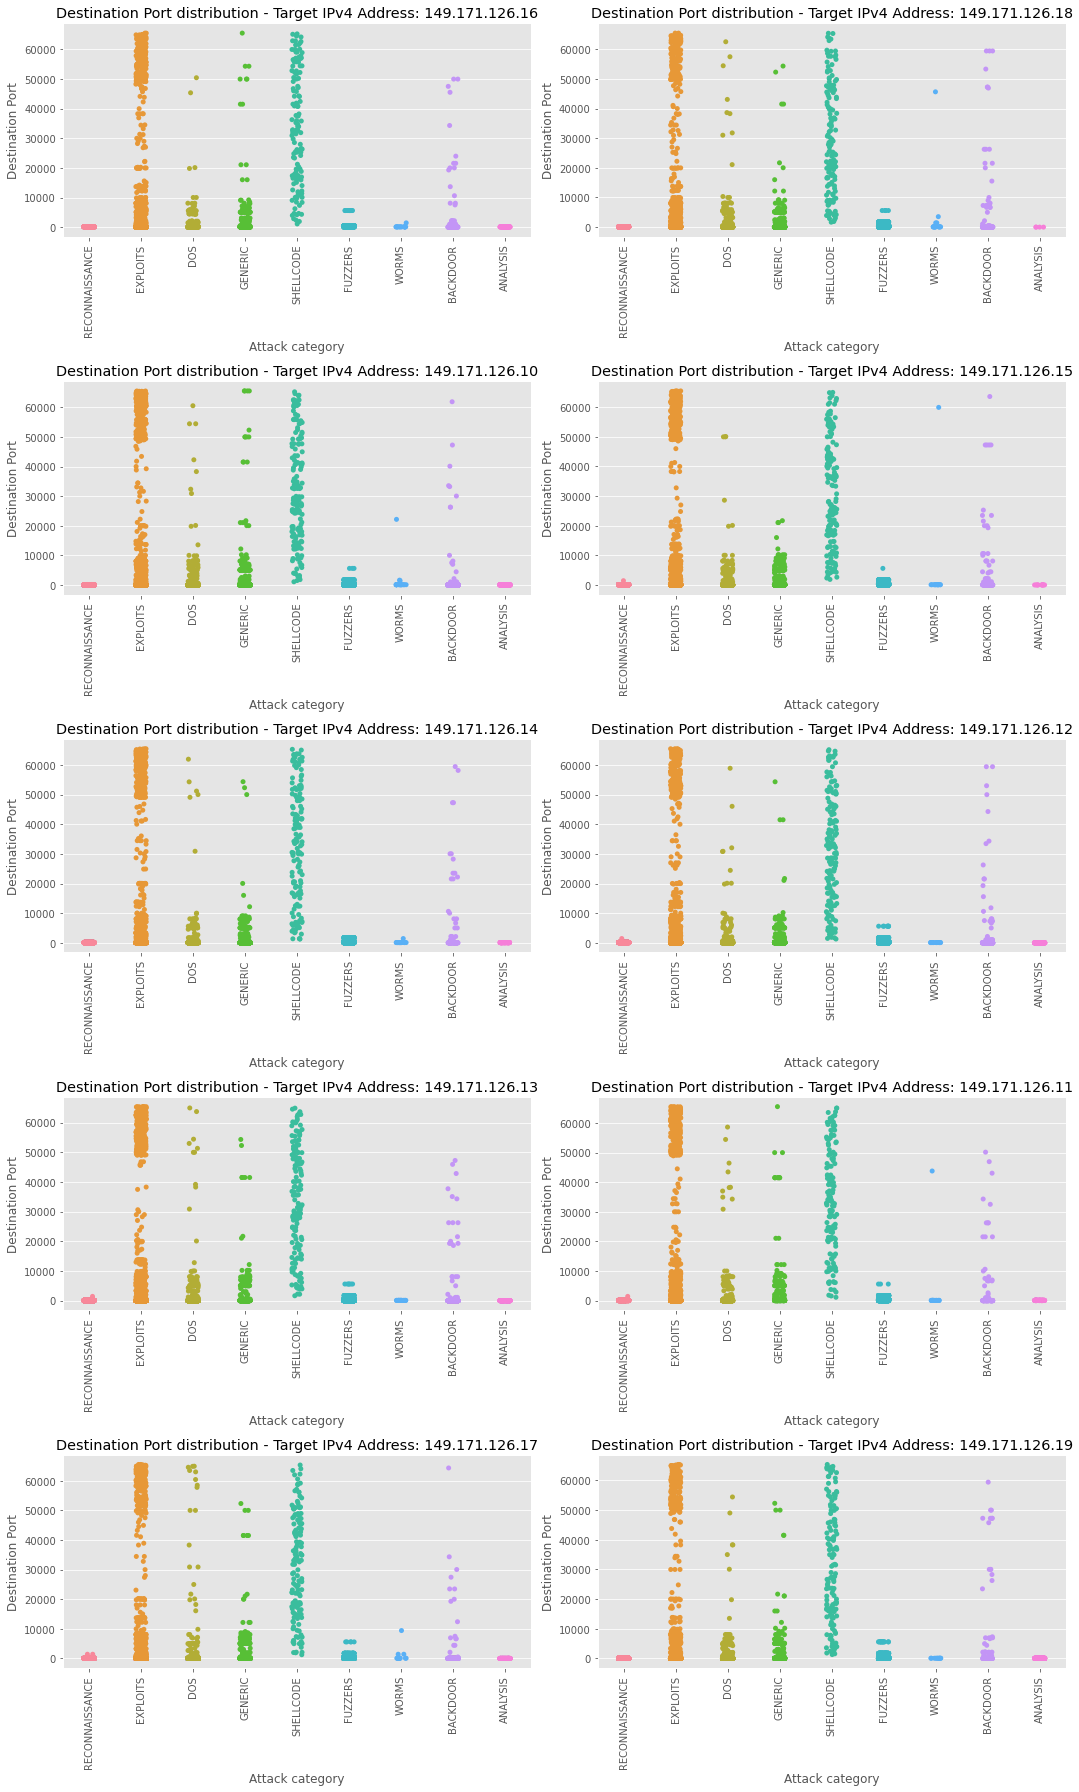

In [129]:
ips = list(newdf['Destination IP'].unique())
f, axes = plt.subplots(5, 2)
f.set_figheight(25)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())

for i, ip in enumerate(ips):
    sns.stripplot(x='Attack category',y='Destination Port',data=newdf[newdf['Destination IP'] == ip], order=labels, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_xlabel('Attack category')
    axes[int(i/2)][i%2].set_ylabel('Destination Port')
    axes[int(i/2)][i%2].set_title('Destination Port distribution - Target IPv4 Address: ' + ip)
    axes[int(i/2)][i%2].set_xticklabels(labels,rotation=90)
plt.tight_layout()
plt.show()

These graphs show us that there is a differentiation in the way in which the attacks are performing their tasks. There is a particularization by the targets, something that does not happen with the source devices.

In [130]:
import pickle

In [135]:
with open('model_pickle','wb') as f:
    pickle.dump(newdf,f)